<a href="https://colab.research.google.com/github/Dilharajay/real-world-analysis/blob/main/Practicle_Session_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practical Session 04

In [ ]:
import pandas as pd
import numpy as np

data = {
    'Student_ID' : [1,2,3,4,5,5,6,7],
    'name' : ['Alice', 'Bob' ,'Charlie', 'David', 'Eva', 'Eva', 'Frank', None],
    'Attendence' : [85, None, 78, 92, 88, 88, 95, 80],
    'Assingment_Score' : [75, 80, np.nan, 90, 85, 85, 95, 200],
    "Final_Grade" : ["B", "A", "C", "A", None, None, "A", "B"]
}

df = pd.DataFrame(data)
print(df)

   Student_ID     name  Attendence  Assingment_Score Final_Grade
0           1    Alice        85.0              75.0           B
1           2      Bob         NaN              80.0           A
2           3  Charlie        78.0               NaN           C
3           4    David        92.0              90.0           A
4           5      Eva        88.0              85.0        None
5           5      Eva        88.0              85.0        None
6           6    Frank        95.0              95.0           A
7           7     None        80.0             200.0           B


##Cheking data for Data Issues

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student_ID        8 non-null      int64  
 1   name              7 non-null      object 
 2   Attendence        7 non-null      float64
 3   Assingment_Score  7 non-null      float64
 4   Final_Grade       6 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 452.0+ bytes


In [ ]:
df.isna().sum()

,0
Student_ID,0
name,1
Attendence,1
Assingment_Score,1
Final_Grade,2


In [ ]:
df[df.isnull().any(axis=1)]

,Student_ID,name,Attendence,Assingment_Score,Final_Grade
1,2,Bob,NaN,80.0,A
2,3,Charlie,78.0,NaN,C
4,5,Eva,88.0,85.0,None
5,5,Eva,88.0,85.0,None
7,7,None,80.0,200.0,B


##Hanldeling Missing Values

In [ ]:
df['Attendence'].fillna(df['Attendence'].mean(), inplace=True)
df

/tmp/ipython-input-1539856102.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendence'].fillna(df['Attendence'].mean(), inplace=True)


,Student_ID,name,Attendence,Assingment_Score,Final_Grade
0,1,Alice,85.000000,75.0,B
1,2,Bob,86.571429,80.0,A
2,3,Charlie,78.000000,NaN,C
3,4,David,92.000000,90.0,A
4,5,Eva,88.000000,85.0,None
5,5,Eva,88.000000,85.0,None
6,6,Frank,95.000000,95.0,A
7,7,None,80.000000,200.0,B


In [ ]:
df['Final_Grade'].fillna("Unknown", inplace=True)
df['Assingment_Score'].fillna(df['Assingment_Score'].mode()[0], inplace=True)
df

/tmp/ipython-input-90039278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Final_Grade'].fillna("Unknown", inplace=True)
/tmp/ipython-input-90039278.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,Student_ID,name,Attendence,Assingment_Score,Final_Grade
0,1,Alice,85.000000,75.0,B
1,2,Bob,86.571429,80.0,A
2,3,Charlie,78.000000,85.0,C
3,4,David,92.000000,90.0,A
4,5,Eva,88.000000,85.0,Unknown
5,5,Eva,88.000000,85.0,Unknown
6,6,Frank,95.000000,95.0,A
7,7,None,80.000000,200.0,B


In [ ]:
df.dropna(subset=['name'], inplace=True)
df

,Student_ID,name,Attendence,Assingment_Score,Final_Grade
0,1,Alice,85.000000,75.0,B
1,2,Bob,86.571429,80.0,A
2,3,Charlie,78.000000,85.0,C
3,4,David,92.000000,90.0,A
4,5,Eva,88.000000,85.0,Unknown
5,5,Eva,88.000000,85.0,Unknown
6,6,Frank,95.000000,95.0,A


##Detecting outliers

In [ ]:

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df['Attendence'] < lower_bound) | (df['Attendence'] > upper_bound)]

    return outliers

for column in numneric_columns.columns:
    outliers = detect_outliers(df, column)
    if not outliers.empty:
        print(f"Outliers in column '{column}':")
        print(outliers)
        print()

outliers = detect_outliers(df, 'Attendence')
print(outliers)

Outliers in column 'Student_ID':
   Student_ID     name  Attendence  Assingment_Score Final_Grade
0           1    Alice   85.000000              75.0           B
1           2      Bob   86.571429              80.0           A
2           3  Charlie   78.000000              85.0           C
3           4    David   92.000000              90.0           A
4           5      Eva   88.000000              85.0     Unknown
5           5      Eva   88.000000              85.0     Unknown
6           6    Frank   95.000000              95.0           A

Outliers in column 'Attendence':
   Student_ID     name  Attendence  Assingment_Score Final_Grade
2           3  Charlie        78.0              85.0           C

   Student_ID     name  Attendence  Assingment_Score Final_Grade
2           3  Charlie        78.0              85.0           C


##Visualizing Outliers


/tmp/ipython-input-520817703.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Attendence'], df['Assingment_Score']], labels=['Attendence', 'Assingment_Scores'] )


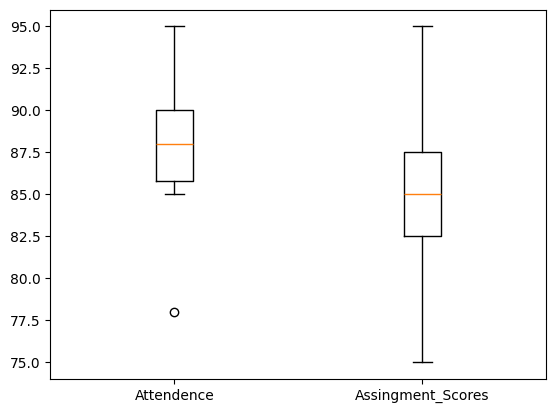

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([df['Attendence'], df['Assingment_Score']], labels=['Attendence', 'Assingment_Scores'] )
plt.show()

##Handeling Duplicates

In [ ]:
print("Duplicated records: " , df.duplicated().sum())

Duplicated records:  1


In [ ]:
df.drop_duplicates(inplace=True)
df

,Student_ID,name,Attendence,Assingment_Score,Final_Grade
0,1,Alice,85.000000,75.0,B
1,2,Bob,86.571429,80.0,A
2,3,Charlie,78.000000,85.0,C
3,4,David,92.000000,90.0,A
4,5,Eva,88.000000,85.0,Unknown
6,6,Frank,95.000000,95.0,A


In [ ]:
df.describe()

,Student_ID,Attendence,Assingment_Score
count,6.000000,6.000000,6.000000
mean,3.500000,87.428571,85.000000
std,1.870829,5.900536,7.071068
min,1.000000,78.000000,75.000000
25%,2.250000,85.392857,81.250000
50%,3.500000,87.285714,85.000000
75%,4.750000,91.000000,88.750000
max,6.000000,95.000000,95.000000


In [ ]:
numneric_columns = df.select_dtypes(include=['number'])
print(numneric_columns)


   Student_ID  Attendence  Assingment_Score
0           1   85.000000              75.0
1           2   86.571429              80.0
2           3   78.000000              85.0
3           4   92.000000              90.0
4           5   88.000000              85.0
6           6   95.000000              95.0
